# Importing modules

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import sys

# Getting Data and Training Model

In [2]:
X = list()
Y = list()
file_name = 'log(base e)_samples.txt'
with open(file_name, 'r') as file:
        # Read each line in the file
        for line in file:
            # Process each line
            x,y = line.strip().split(' ')
            if(y == '-inf'):
                y = sys.float_info.min
            X.append(float(x))
            Y.append(float(y))

X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

## Initialize  model
model = LinearRegression()
model.fit(X, Y)

m = model.coef_
c = model.intercept_

# Calculating The intercepts for upper and lower boundary for function

In [3]:
def getUpperLimit(m,c):
    start = 1000
    Dir = 'U'
    incC = False
    while(start > 1):
        incC = False
        for i in range(len(X)):
            y = m * X[i] + c
            if(y < Y[i]):
                incC = True
                break

        if(Dir == 'U'):
            if incC:
                c += start
            else:
                start /= 2
                Dir = 'D'
        else:
            if incC:
                Dir = 'U'
                start /= 2
                c += start

            else:
                c -= start

    return c

def getLowerLimit(m,c):
    start = 1000
    Dir = 'D'
    decC = False
    while(start > 0.5):
        decC = False
        for i in range(len(X)):
            y = m * X[i] + c
            if(y > Y[i]):
                decC = True
                break

        if(Dir == 'D'):
            if decC:
                c -= start
            else:
                start /= 2
                Dir = 'U'
        else:
            if decC:
                Dir = 'D'
                start /= 2
                c -= start

            else:
                c += start

    return c

c1 = getUpperLimit(m,c)
c2 = getLowerLimit(m,c)

y_original = (m * X) + c
y_upper = m * X + c1
y_lower = m * X + c2

# Ploting Curves

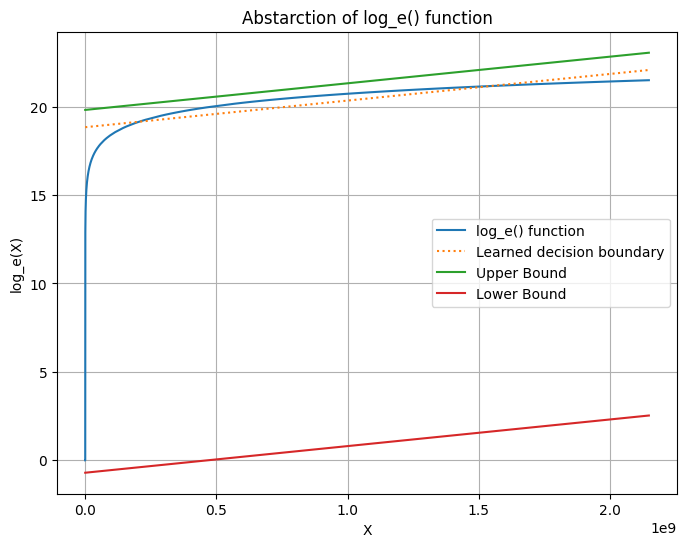

In [4]:
plt.figure(figsize=(8, 6))

plt.xlabel('X')
plt.ylabel('log_e(X)')
plt.title('Abstarction of log_e() function')

plt.plot(X, Y, label='log_e() function')
plt.plot(X, y_original, label='Learned decision boundary',linestyle='dotted')
plt.plot(X, y_upper, label = 'Upper Bound')
plt.plot(X, y_lower, label = 'Lower Bound')


plt.legend()
plt.grid(True)
plt.show()